In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import f
import os
%matplotlib inline
# Numerical libraries
import numpy as np   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
%matplotlib inline 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_excel('Customer Churn Data_2.xlsx')

In [5]:
df1 = pd.read_excel('Customer Churn Data_1.xlsx')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.50,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11042.0,11.025086,12.879782,0.0,2.00,9.00,16.00,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.00,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [8]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


In [9]:
col = ['Tenure','Account_user_count','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']

In [10]:
for i in col:
    df1[i] = df1[i].replace('[@,#,+,$]','')



In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [12]:
for i in col:
    df[i] = df[i].astype('float64')
    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [14]:
df.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11042.000000,11148.000000,11158.000000,11162.000000,10816.000000,11144.000000,10469.000000,10903.000000,11257.000000,11257.000000,10902.000000,10787.000000
mean,25629.50000,0.168384,11.025086,1.653929,17.867091,2.902526,3.692862,3.066493,6.362594,0.285334,16.193391,1.790619,4.633187,196.236370
std,3250.62635,0.374223,12.879782,0.915015,8.853269,0.725584,1.022976,1.379772,11.909686,0.451594,3.757721,1.969551,3.697637,178.660514
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.210000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.250000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,200.010000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [15]:
df.corr()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
AccountID,1.000000,-0.009541,0.007315,0.001983,0.252562,0.301782,0.204683,-0.017715,0.073842,-0.005168,0.170588,0.105686,0.062766,0.029241
Churn,-0.009541,1.000000,-0.233150,0.084135,0.072071,0.008991,0.107292,0.105796,0.022538,0.251488,-0.013877,-0.014826,-0.147956,-0.032382
Tenure,0.007315,-0.233150,1.000000,-0.030223,-0.004261,0.009608,-0.004052,-0.020031,0.028431,-0.021419,0.018824,0.089171,0.122612,0.078416
City_Tier,0.001983,0.084135,-0.030223,1.000000,0.011835,-0.006443,0.025498,-0.011479,-0.028521,0.002478,-0.030025,0.021124,0.023158,0.010516
CC_Contacted_LY,0.252562,0.072071,-0.004261,0.011835,1.000000,0.060052,0.020351,-0.000209,0.015675,0.027244,0.072913,0.004969,0.012938,0.002679
Service_Score,0.301782,0.008991,0.009608,-0.006443,0.060052,1.000000,0.323327,0.032135,0.026691,0.002643,0.103374,0.181914,0.099770,0.042961
Account_user_count,0.204683,0.107292,-0.004052,0.025498,0.020351,0.323327,1.000000,-0.017522,0.020600,0.003411,0.067616,0.146081,0.037573,0.037057
CC_Agent_Score,-0.017715,0.105796,-0.020031,-0.011479,-0.000209,0.032135,-0.017522,1.000000,0.022167,-0.031459,-0.027159,0.030661,0.030808,-0.012599
rev_per_month,0.073842,0.022538,0.028431,-0.028521,0.015675,0.026691,0.020600,0.022167,1.000000,-0.002262,0.024114,0.016548,-0.000923,0.002974
Complain_ly,-0.005168,0.251488,-0.021419,0.002478,0.027244,0.002643,0.003411,-0.031459,-0.002262,1.000000,-0.005122,-0.007023,-0.041111,0.008734


In [16]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [17]:
def impute_df(df, col):
    # if col is float, impute mean
    if df[col].dtype == "float64":
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode(), inplace=True)

In [18]:
for col in df.columns:
    impute_df(df, col)

In [19]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               760
dtype: int64

In [20]:
col1 = ['Payment','Gender','account_segment','Marital_Status','Login_device']

In [21]:
mode1=df["Gender"].mode().values[0]
df["Gender"]=df["Gender"].replace(np.nan,mode1)

In [22]:
mode2=df["Payment"].mode().values[0]
mode3=df["account_segment"].mode().values[0]
mode4=df["Marital_Status"].mode().values[0]
mode5=df["Login_device"].mode().values[0]

df["Payment"]= df["Payment"].replace(np.nan,mode2)
df["account_segment"]=df["account_segment"].replace(np.nan,mode3)
df["Marital_Status"]=df["Marital_Status"].replace(np.nan,mode4)
df["Login_device"]=df["Login_device"].replace(np.nan,mode5)


In [23]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

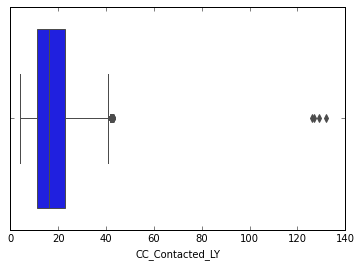

In [24]:
sns.boxplot(df['CC_Contacted_LY'])

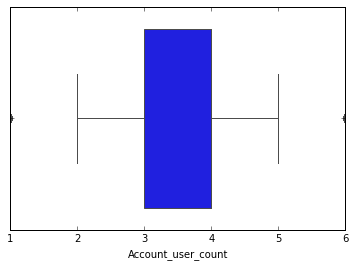

In [25]:
sns.boxplot(df['Account_user_count'])

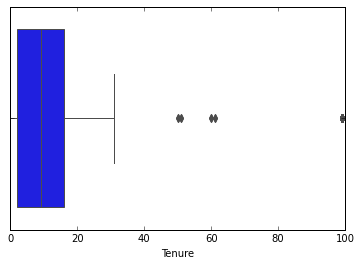

In [26]:
sns.boxplot(df['Tenure'])

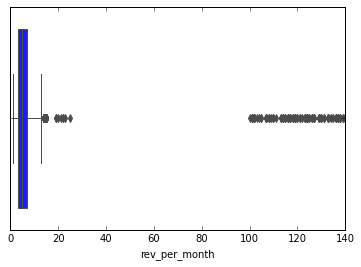

In [27]:
sns.boxplot(df['rev_per_month'])

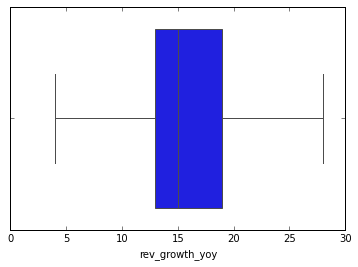

In [28]:
sns.boxplot(df['rev_growth_yoy'])

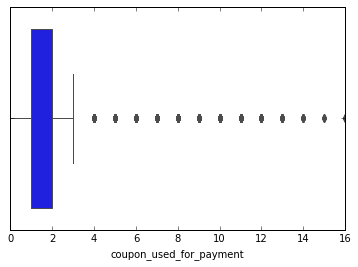

In [29]:
sns.boxplot(df['coupon_used_for_payment'])

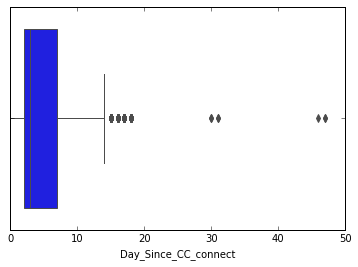

In [30]:
sns.boxplot(df['Day_Since_CC_connect'])

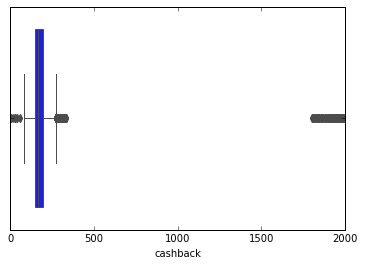

In [31]:
sns.boxplot(df['cashback'])

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [33]:
lcs,ucs=remove_outlier(df['cashback'])
df['cashback']=np.where(df['cashback']>ucs,ucs,df['cashback'])
df['cashback']=np.where(df['cashback']<lcs,lcs,df['cashback'])

lrtravel,urtravel=remove_outlier(df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']>urtravel,urtravel,df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']<lrtravel,lrtravel,df['Day_Since_CC_connect'])

lrmiles,urmiles=remove_outlier(df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']>urmiles,urmiles,df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']<lrmiles,lrmiles,df['rev_per_month'])

lten,uten=remove_outlier(df['Tenure'])
df['Tenure']=np.where(df['Tenure']>uten,uten,df['Tenure'])
df['Tenure']=np.where(df['Tenure']<lten,lten,df['Tenure'])

lte,ute=remove_outlier(df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']>ute,ute,df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']<lte,lte,df['CC_Contacted_LY'])



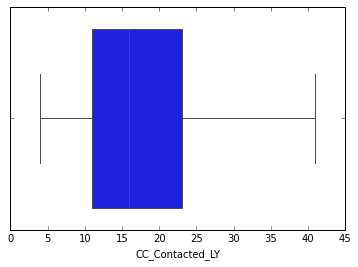

In [34]:
sns.boxplot(df['CC_Contacted_LY'])

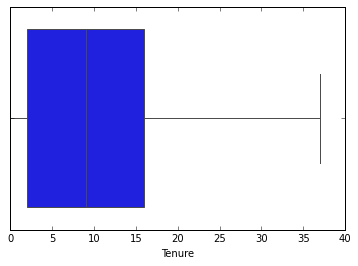

In [35]:
sns.boxplot(df['Tenure'])

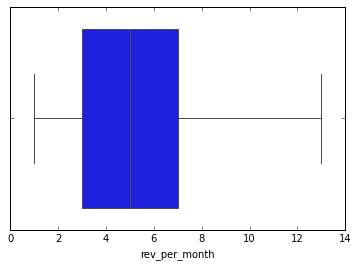

In [36]:
sns.boxplot(df['rev_per_month'])

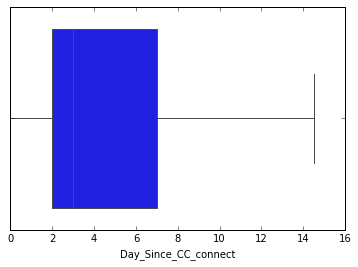

In [37]:
sns.boxplot(df['Day_Since_CC_connect'])

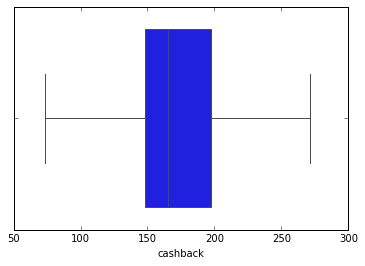

In [38]:
sns.boxplot(df['cashback'])

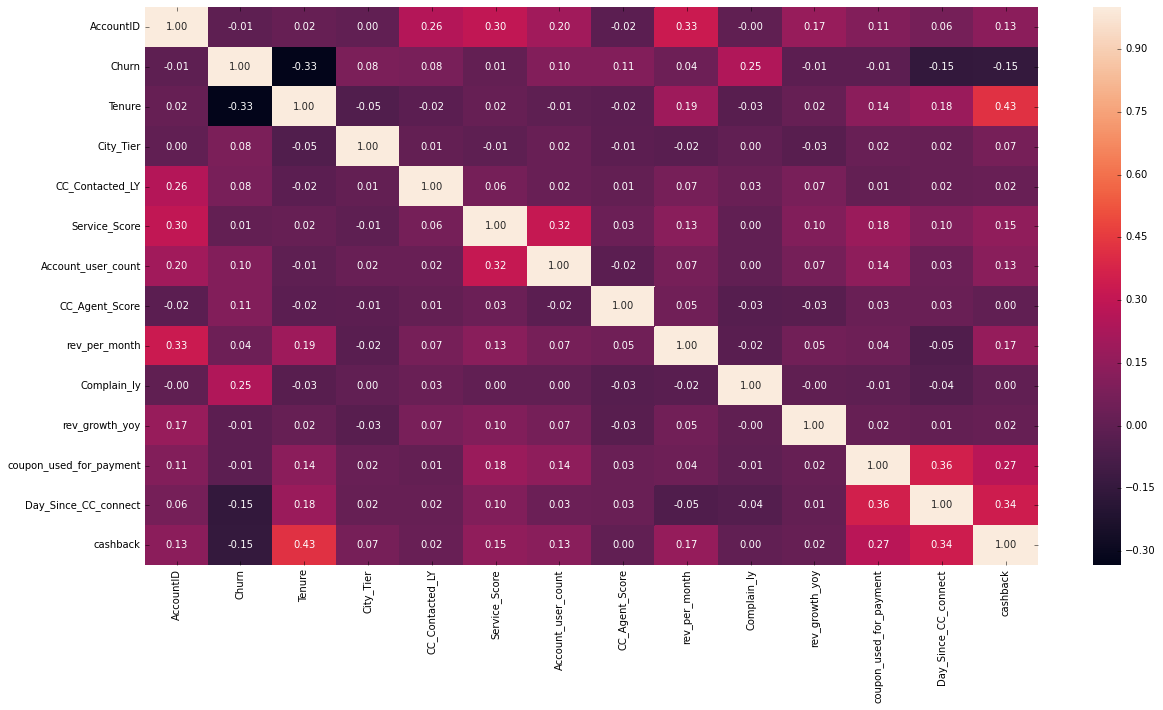

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

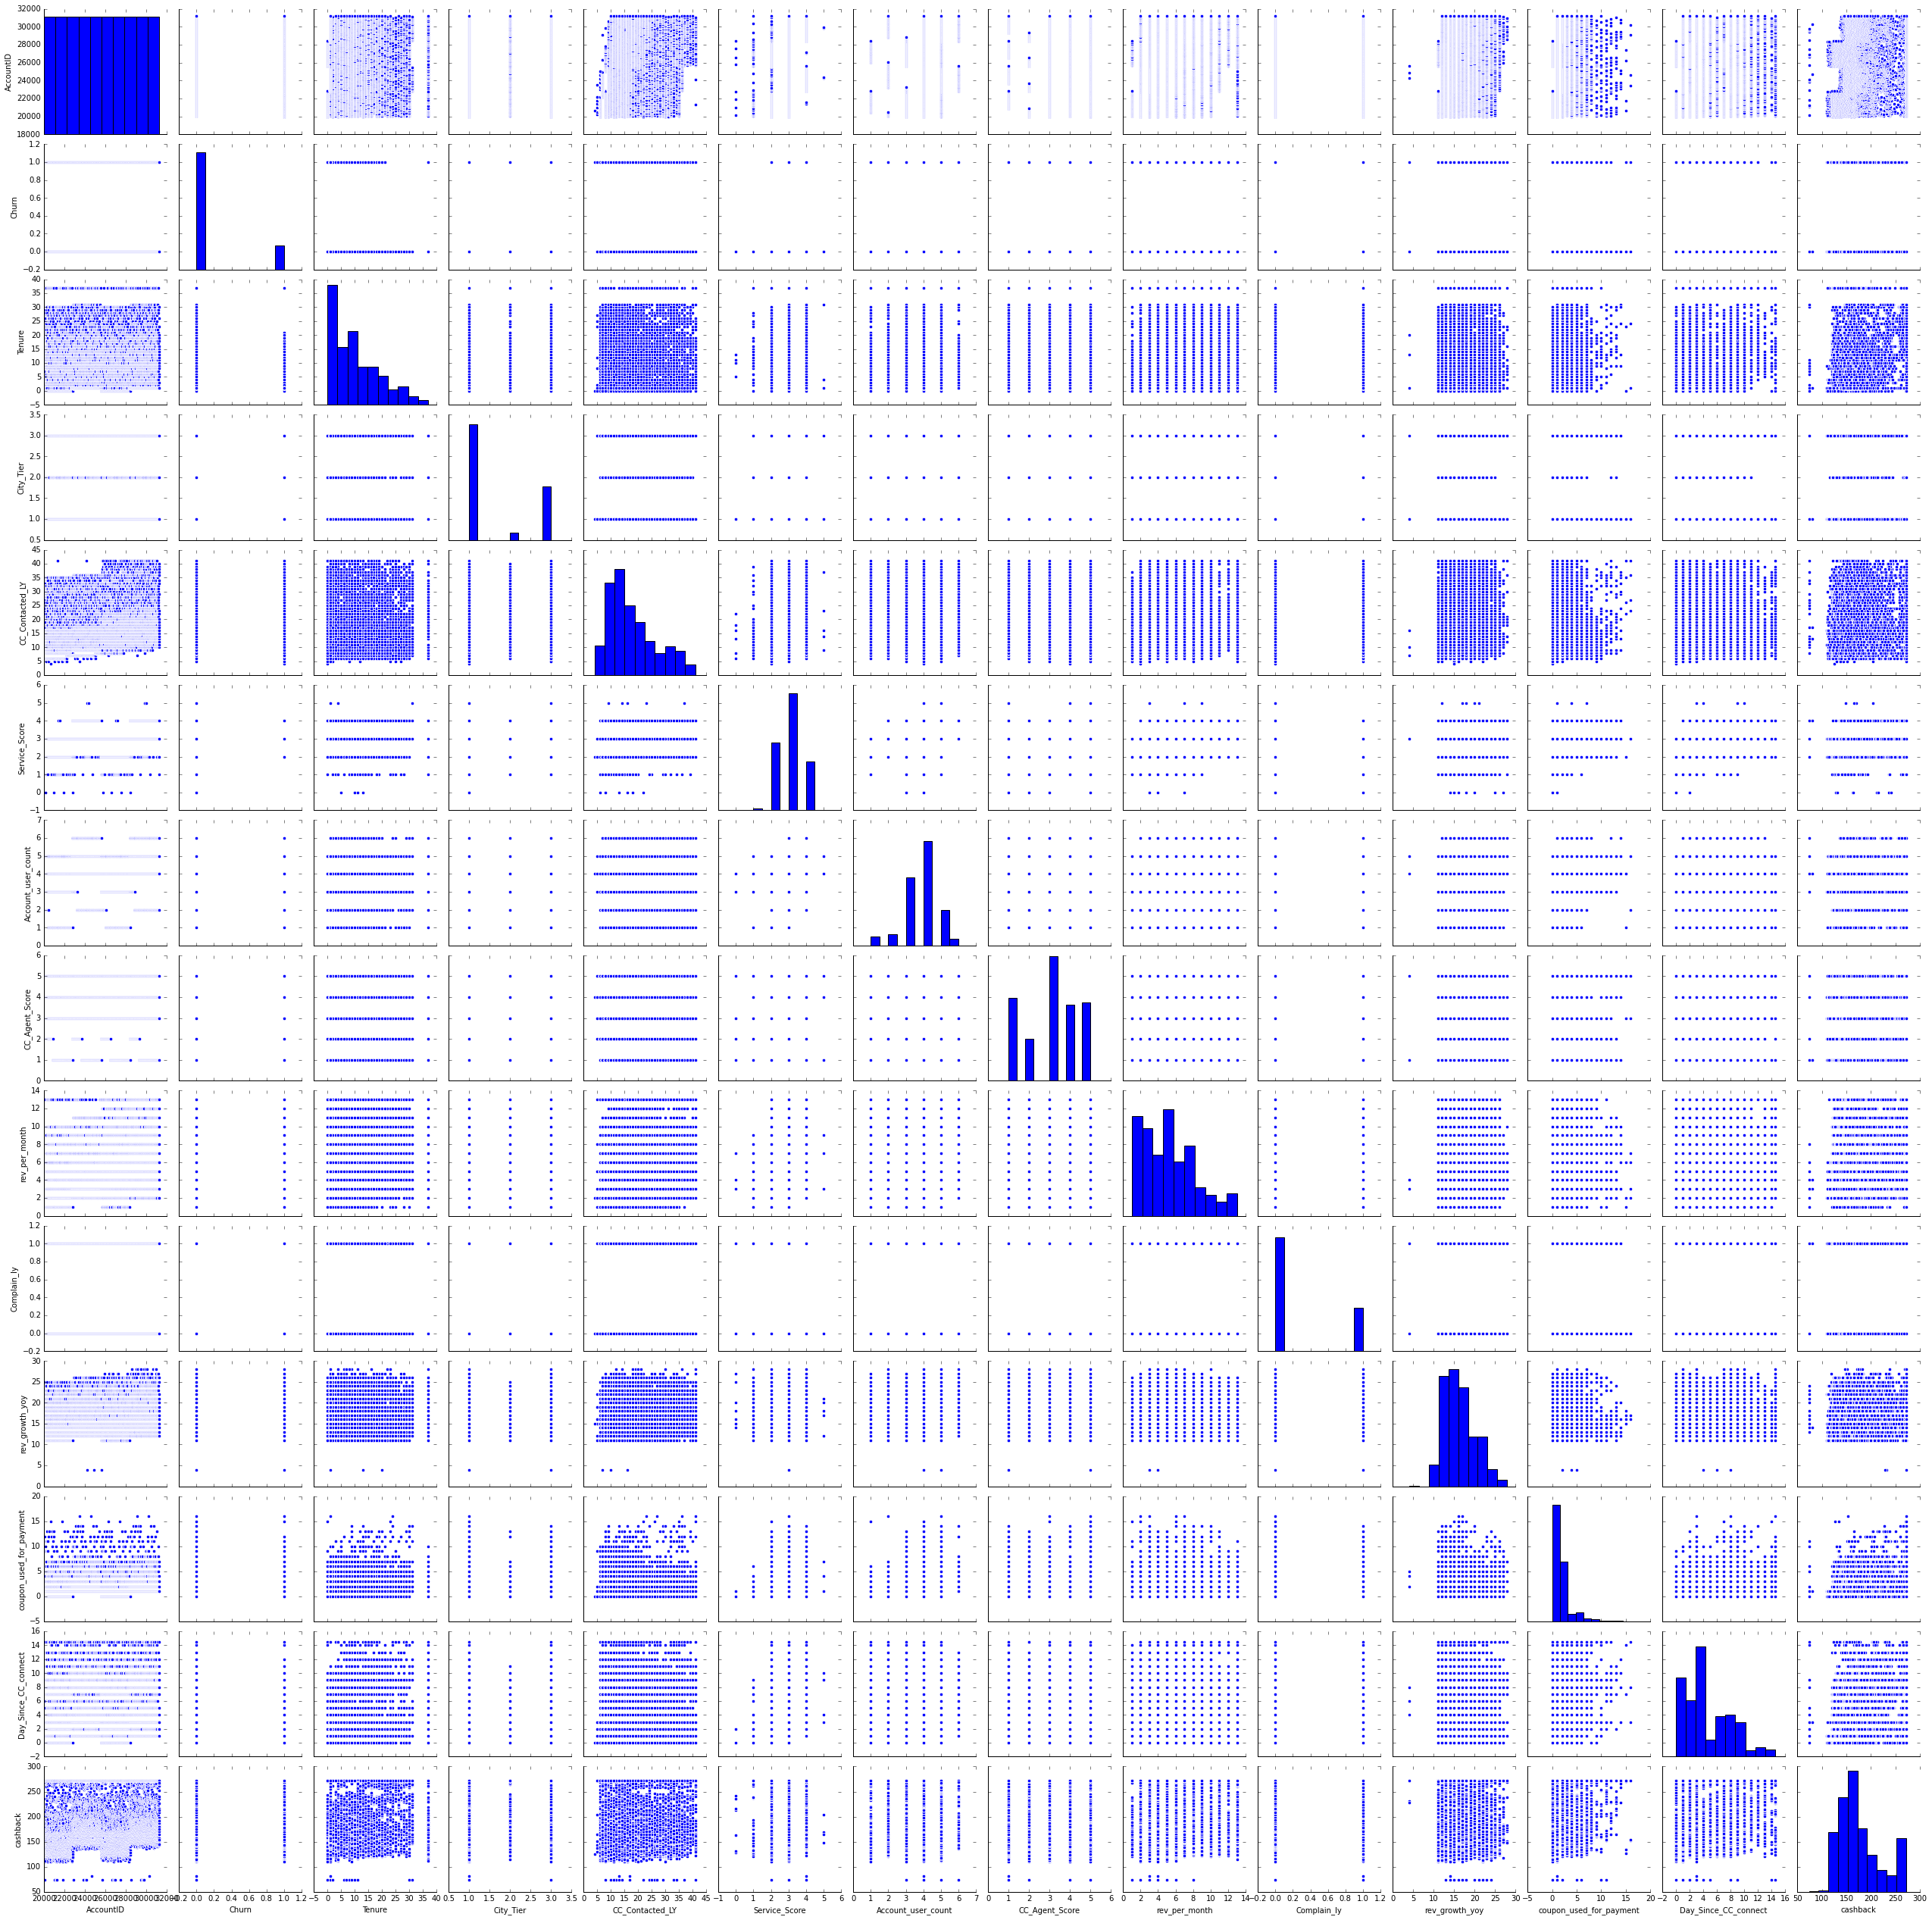

In [40]:
sns.pairplot(df)

In [41]:
df.to_excel('modo.xlsx')

In [42]:
df['Gender'] = df['Gender'].replace('F','Female')

In [43]:
df['Gender'] = df['Gender'].replace('M','Male')

In [44]:
df['account_segment'] = df['account_segment'].replace('Regular +','Regular Plus')

In [45]:
df['account_segment'] = df['account_segment'].replace('Super +','Super Plus')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [47]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [49]:
encoding = {"Payment":     {"Debit Card": 1, "Credit Card": 2, "Cash on Delivery": 3, "E wallet": 4, "UPI": 5},
                "Gender": {"Male": 1, "Female": 2, },
               "account_segment": {"Super Plus": 2, "Super": 3, "Regular Plus": 4, "Regular": 5, "HNI": 1},
               "Marital_Status":  {"Single": 1, "Married": 2, "Divorced": 3},
           "Login_device": {"Mobile": 1, "Computer": 2}}

In [50]:
df = df.replace(encoding)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,1,2,3.0,3.0,3,2.0,1,9.0,1.0,11.0,1.0,5.0,159.93,1
1,20001,1,0.0,1.0,8.0,5,1,3.0,4.0,4,3.0,1,7.0,1.0,15.0,0.0,0.0,120.90,1
2,20002,1,0.0,1.0,30.0,1,1,2.0,4.0,4,3.0,1,6.0,1.0,14.0,0.0,3.0,165.25,1
3,20003,1,0.0,3.0,15.0,1,1,2.0,4.0,3,5.0,1,8.0,0.0,23.0,0.0,3.0,134.07,1
4,20004,1,0.0,1.0,12.0,2,1,2.0,3.0,4,5.0,1,3.0,0.0,11.0,1.0,3.0,129.60,1


In [51]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df)

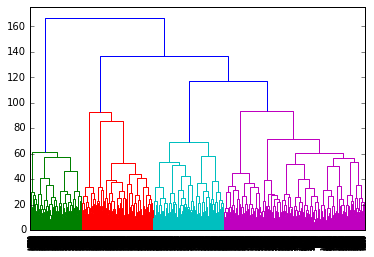

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(scaled_df, method = 'ward')
dend = dendrogram(wardlink)

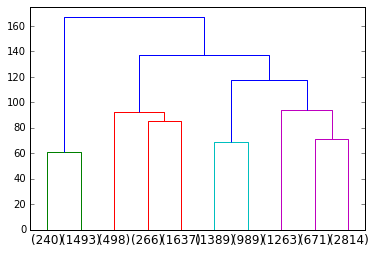

In [25]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [26]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [27]:
df_cl = df

In [28]:
df_cl['clusters_hierarchical'] = clusters
df_cl.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,clusters_hierarchical
0,20000,1,4.0,3.0,6.0,1,2,3.0,3.0,3,2.0,1,9.0,1.0,11.0,1.0,5.0,159.93,1,1
1,20001,1,0.0,1.0,8.0,5,1,3.0,4.0,4,3.0,1,7.0,1.0,15.0,0.0,0.0,120.90,1,1
2,20002,1,0.0,1.0,30.0,1,1,2.0,4.0,4,3.0,1,6.0,1.0,14.0,0.0,3.0,165.25,1,1
3,20003,1,0.0,3.0,15.0,1,1,2.0,4.0,3,5.0,1,8.0,0.0,23.0,0.0,3.0,134.07,1,1
4,20004,1,0.0,1.0,12.0,2,1,2.0,3.0,4,5.0,1,3.0,0.0,11.0,1.0,3.0,129.60,1,1


In [29]:
df_cl.to_excel('Clustered_capstone_new.xlsx')

In [50]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,1,2,3.0,3.0,3,2.0,1,9.0,1.0,11.0,1.0,5.0,159.93,1
1,20001,1,0.0,1.0,8.0,5,1,3.0,4.0,4,3.0,1,7.0,1.0,15.0,0.0,0.0,120.90,1
2,20002,1,0.0,1.0,30.0,1,1,2.0,4.0,4,3.0,1,6.0,1.0,14.0,0.0,3.0,165.25,1
3,20003,1,0.0,3.0,15.0,1,1,2.0,4.0,3,5.0,1,8.0,0.0,23.0,0.0,3.0,134.07,1
4,20004,1,0.0,1.0,12.0,2,1,2.0,3.0,4,5.0,1,3.0,0.0,11.0,1.0,3.0,129.60,1


In [53]:
X = df.drop(labels= "Churn" , axis = 1)
y = df["Churn"]

In [54]:
# Split X and y into training and test set in 75:25 ratio

X_train_initial, X_test, y_train_intial, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [57]:
sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_sample(X_train_initial, y_train_intial.ravel()) 

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
LoR = LogisticRegression(max_iter=10000,n_jobs=2)
LoR.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=2)

In [60]:
ytrain_predict_lor = LoR.predict(X_train)
ytest_predict_lor = LoR.predict(X_test)

In [61]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# Accuracy - Training Data
LoR.score(X_train, y_train)

0.8217663209273948

In [62]:
LoR.score(X_test, y_test)

0.7992895204262878

In [63]:
print(classification_report(y_train, ytrain_predict_lor))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6556
           1       0.82      0.83      0.82      6556

    accuracy                           0.82     13112
   macro avg       0.82      0.82      0.82     13112
weighted avg       0.82      0.82      0.82     13112



In [64]:
print(classification_report(y_test, ytest_predict_lor))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2808
           1       0.44      0.71      0.54       570

    accuracy                           0.80      3378
   macro avg       0.69      0.76      0.71      3378
weighted avg       0.85      0.80      0.82      3378



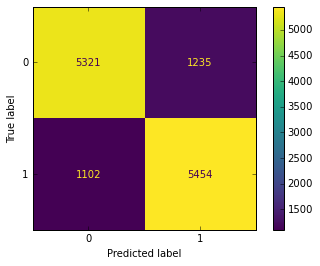

In [65]:
plot_confusion_matrix(LoR,X_train,y_train);

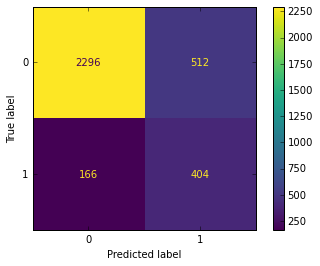

In [66]:
plot_confusion_matrix(LoR,X_test,y_test);

AUC: 0.900


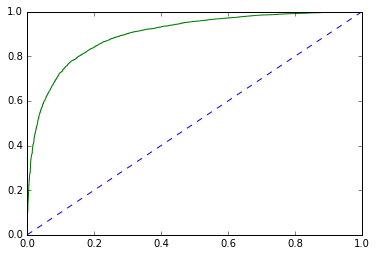

In [67]:
#AUC and ROC for the test data
# predict probabilities
probs = LoR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_test = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_lor_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC: 0.847


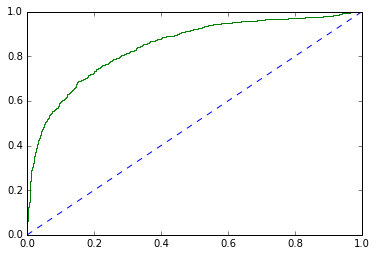

In [68]:
#AUC and ROC for the test data
# predict probabilities
probs = LoR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_lor_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [69]:
##Applying best parameters for grid search
from sklearn.model_selection import train_test_split,GridSearchCV
model = LogisticRegression(max_iter=10000,n_jobs=2)
grid={'penalty':['l2','none'],
      'solver':['newton-cg','lfgs','sags'],
      'tol':[0.00001]}
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 4,n_jobs=2,scoring='f1')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg', tol=1e-05)


In [70]:
best_model = grid_search.best_estimator_

In [71]:
# Prediction on the training set
ytrain_predict_lrtuned = best_model.predict(X_train)
ytest_predict_lrtuned = best_model.predict(X_test)

In [72]:
best_model.score(X_train,y_train)

0.8354179377669311

In [73]:
best_model.score(X_test,y_test)

0.8052101835405565

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      6556
           1       0.82      0.85      0.84      6556

    accuracy                           0.84     13112
   macro avg       0.84      0.84      0.84     13112
weighted avg       0.84      0.84      0.84     13112
 



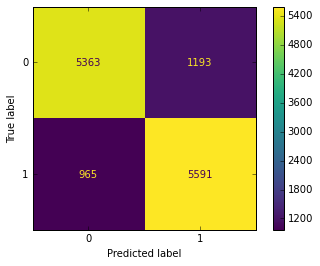

In [74]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict_lrtuned),'\n');


              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2808
           1       0.45      0.70      0.55       570

    accuracy                           0.81      3378
   macro avg       0.69      0.76      0.71      3378
weighted avg       0.85      0.81      0.82      3378
 



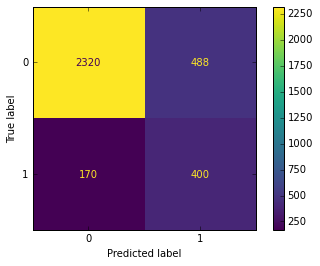

In [75]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict_lrtuned),'\n');

AUC: 0.911


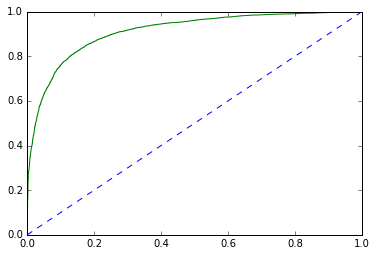

In [76]:
#AUC and ROC for the training data
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_lor_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.848


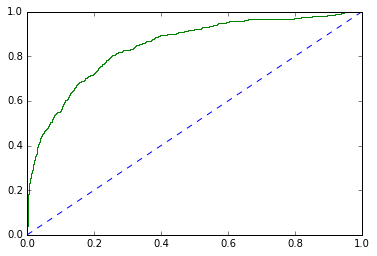

In [77]:
#AUC and ROC for the test data
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_lor_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# LDA

In [78]:
lda = LinearDiscriminantAnalysis()
lda=lda.fit(X_train,y_train)

In [79]:
# Training Data Class Prediction with a cut-off value of 0.5
lda_train_predict = lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
lda_test_predict = lda.predict(X_test)

In [80]:
lda.score(X_train,y_train)

0.8296217205613179

In [81]:
lda.score(X_test,y_test)

0.7806394316163411

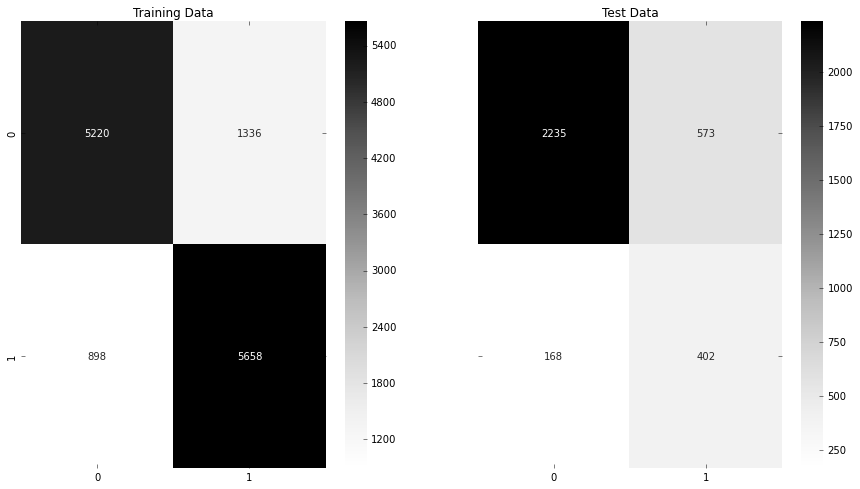

In [82]:
#Training Data and Test Data Confusion Matrix Comparison
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,lda_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,lda_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [83]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,lda_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,lda_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.80      0.82      6556
           1       0.81      0.86      0.84      6556

    accuracy                           0.83     13112
   macro avg       0.83      0.83      0.83     13112
weighted avg       0.83      0.83      0.83     13112
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.93      0.80      0.86      2808
           1       0.41      0.71      0.52       570

    accuracy                           0.78      3378
   macro avg       0.67      0.75      0.69      3378
weighted avg       0.84      0.78      0.80      3378
 



AUC for the Training Data: 0.910
AUC for the Test Data: 0.843


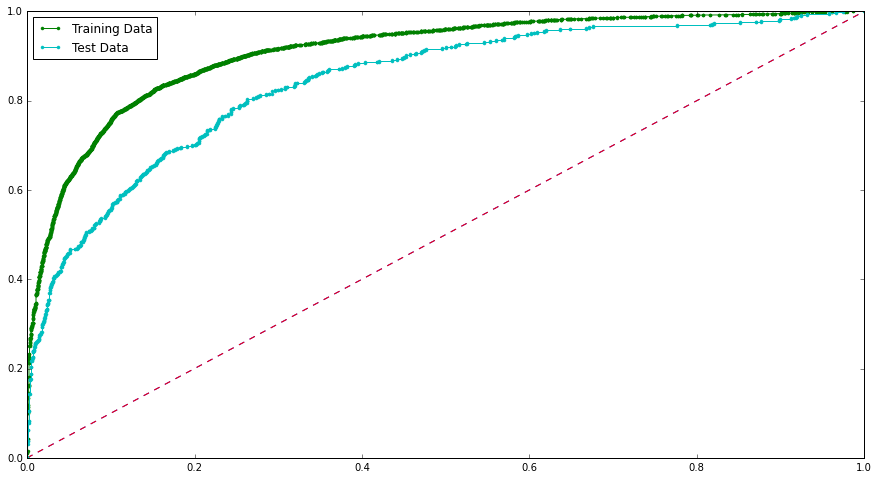

In [84]:
# Training Data Probability Prediction
pred_prob_train_lda = lda.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_lda = lda.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
auc_lda_train = metrics.roc_auc_score(y_train,pred_prob_train_lda[:,1])
print('AUC for the Training Data: %.3f' % auc_lda_train)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc_lda_test = metrics.roc_auc_score(y_test,pred_prob_test_lda[:,1])
print('AUC for the Test Data: %.3f' % auc_lda_test)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [85]:
model_lda = LinearDiscriminantAnalysis()
grid={
      'solver':['lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}
grid_search = GridSearchCV(estimator = model_lda, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(solver='lsqr')


In [86]:
best_model = grid_search.best_estimator_
# Prediction on the training set
ytrain_predict_ldatuned = best_model.predict(X_train)
ytest_predict_ldatuned = best_model.predict(X_test)

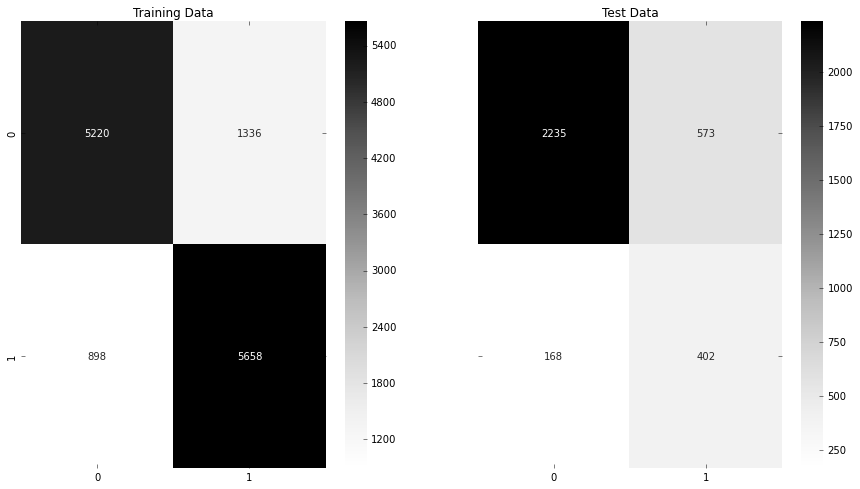

In [87]:
#Training Data and Test Data Confusion Matrix Comparison
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_ldatuned)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_ldatuned)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [88]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_ldatuned),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_ldatuned),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.80      0.82      6556
           1       0.81      0.86      0.84      6556

    accuracy                           0.83     13112
   macro avg       0.83      0.83      0.83     13112
weighted avg       0.83      0.83      0.83     13112
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.93      0.80      0.86      2808
           1       0.41      0.71      0.52       570

    accuracy                           0.78      3378
   macro avg       0.67      0.75      0.69      3378
weighted avg       0.84      0.78      0.80      3378
 



AUC for the Training Data: 0.910
AUC for the Test Data: 0.843


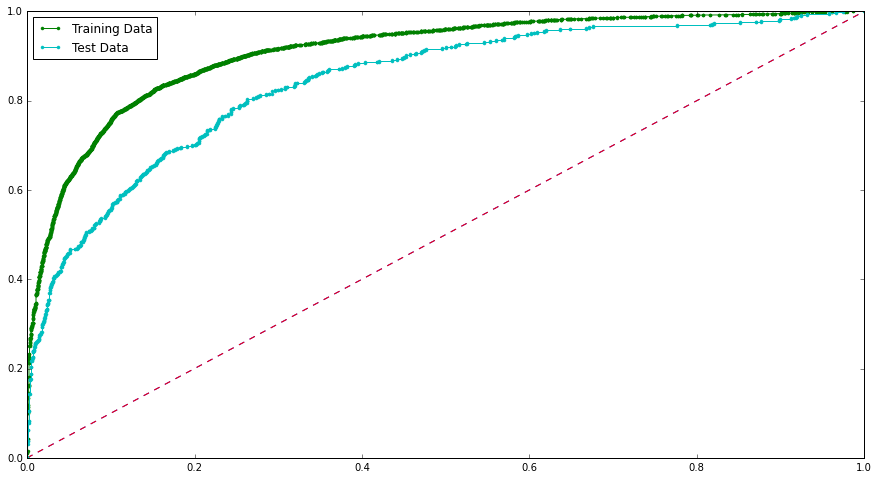

In [89]:
# Training Data Probability Prediction
pred_prob_train_lda = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_lda = best_model.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
auc_lda_train = metrics.roc_auc_score(y_train,pred_prob_train_lda[:,1])
print('AUC for the Training Data: %.3f' % auc_lda_train)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc_lda_test = metrics.roc_auc_score(y_test,pred_prob_test_lda[:,1])
print('AUC for the Test Data: %.3f' % auc_lda_test)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# KNN

In [90]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,AccountID,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04,1.126000e+04
mean,-1.267981e-17,-5.936637e-17,-1.519408e-16,-9.186898e-16,-2.652309e-18,3.338951e-16,2.813716e-14,-1.004876e-14,-8.393966e-17,-4.672002e-16,3.109290e-15,-1.377510e-15,1.024048e-16,-2.805443e-15,-1.558453e-15,8.223045e-16,-1.351197e-15,2.310368e-16
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00
min,-1.731897e+00,-1.153334e+00,-7.093336e-01,-1.613194e+00,-8.802918e-01,-8.080627e-01,-4.018826e+00,-2.693288e+00,-1.914830e+00,-1.505031e+00,-1.268725e+00,-1.476234e+00,-6.178710e-01,-3.245338e+00,-9.091861e-01,-1.301411e+00,-2.375971e+00,-6.051225e-01
25%,-8.659485e-01,-9.283244e-01,-7.093336e-01,-7.957964e-01,-8.802918e-01,-8.080627e-01,-1.250443e+00,-7.019278e-01,-8.669824e-02,-7.764876e-01,-1.268725e+00,-7.816665e-01,-6.178710e-01,-8.498761e-01,-4.013768e-01,-7.288931e-01,-6.746236e-01,-6.051225e-01
50%,0.000000e+00,-1.407909e-01,-7.093336e-01,-2.119407e-01,-8.592686e-02,-8.080627e-01,1.337478e-01,2.937521e-01,-8.669824e-02,-4.794412e-02,2.497532e-01,-8.709857e-02,-6.178710e-01,-3.175512e-01,-4.013768e-01,-4.426340e-01,-2.761966e-01,-6.051225e-01
75%,8.659485e-01,6.467427e-01,1.481914e+00,6.054573e-01,7.084381e-01,1.237528e+00,1.337478e-01,2.937521e-01,8.273674e-01,6.805994e-01,2.497532e-01,6.074693e-01,1.618461e+00,7.470986e-01,1.064325e-01,7.024027e-01,4.596080e-01,1.652558e+00
max,1.731897e+00,3.009343e+00,1.481914e+00,2.707338e+00,2.297168e+00,1.237528e+00,2.902130e+00,2.285112e+00,1.741433e+00,1.409143e+00,1.768231e+00,2.691173e+00,1.618461e+00,3.142561e+00,7.215763e+00,2.849346e+00,2.160955e+00,1.652558e+00


In [102]:
X_train_kn, X_test_knn, y_train_kn, y_test_knn = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [104]:
X_train_knn, y_train_knn = sm.fit_sample(X_train_kn, y_train_kn.ravel()) 

In [105]:
NNH = KNeighborsClassifier(n_neighbors= 5)

In [106]:
NNH.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

In [107]:
NNH.score(X_train_knn, y_train_knn)

0.9685021354484442

In [108]:
NNH.score(X_test_knn, y_test_kn)

0.9138543516873889

AUC: 1.000


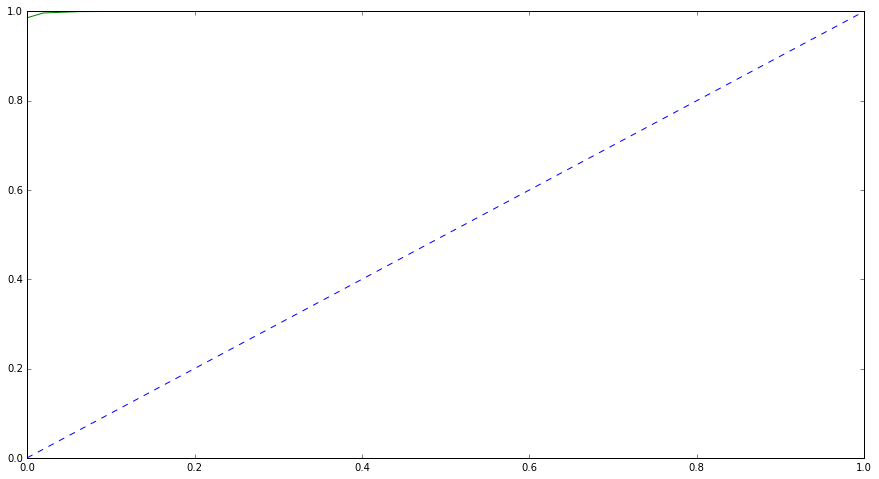

In [109]:
#AUC and ROC for the training data
# predict probabilities
probs = NNH.predict_proba(X_train_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_knn_train = roc_auc_score(y_train_knn, probs)
print('AUC: %.3f' % auc_knn_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.970


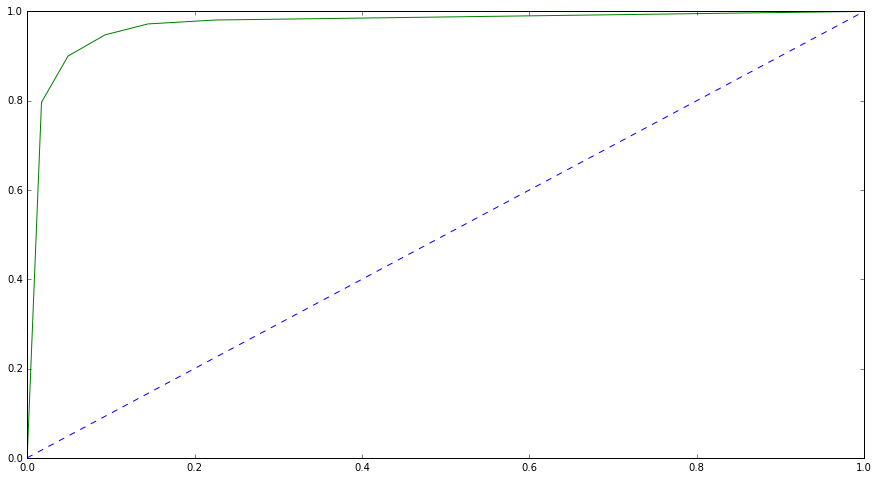

In [110]:
#AUC and ROC for the test data
# predict probabilities
probs = NNH.predict_proba(X_test_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_knn_test = roc_auc_score(y_test_kn, probs)
print('AUC: %.3f' % auc_knn_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_kn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [111]:
predicted_labels_test = NNH.predict(X_test_knn)
predicted_labels_train = NNH.predict(X_train_knn)
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,predicted_labels_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,predicted_labels_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      0.94      0.97      6556
           1       0.94      1.00      0.97      6556

    accuracy                           0.97     13112
   macro avg       0.97      0.97      0.97     13112
weighted avg       0.97      0.97      0.97     13112
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.91      0.95      2808
           1       0.67      0.95      0.79       570

    accuracy                           0.91      3378
   macro avg       0.83      0.93      0.87      3378
weighted avg       0.94      0.91      0.92      3378
 



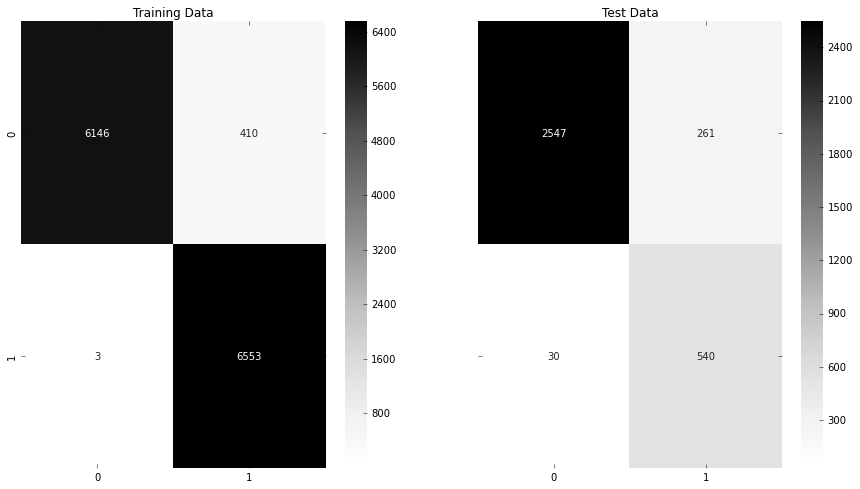

In [171]:
#Training Data and Test Data Confusion Matrix Comparison
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,predicted_labels_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,predicted_labels_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [175]:
model_knn = KNeighborsClassifier()
grid={'n_neighbors':[4,5],
              'leaf_size':[1,3,5],
              'algorithm':['auto','kd_tree'],
              'n_jobs':[2],
              'weights' :['distance','uniform']
      }
grid_search = GridSearchCV(estimator = model_knn, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')

grid_search.fit(X_train_knn, y_train_knn)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': 2, 'n_neighbors': 4, 'weights': 'distance'} 

KNeighborsClassifier(leaf_size=1, n_jobs=2, n_neighbors=4, weights='distance')


In [178]:
best_model_k = grid_search.best_estimator_

In [179]:
# Prediction on the training set
ytrain_predict_knn_tuned = best_model_k.predict(X_train_knn)
ytest_predict_knn_tuned = best_model_k.predict(X_test_knn)

In [180]:
best_model_k.score(X_train_knn,y_train_knn)

1.0

In [181]:
best_model_k.score(X_test_knn,y_test_kn)

0.9425695677915926

In [182]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_knn_tuned),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_knn_tuned),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2808
           1       0.77      0.94      0.85       570

    accuracy                           0.94      3378
   macro avg       0.88      0.94      0.91      3378
weighted avg       0.95      0.94      0.94      3378
 



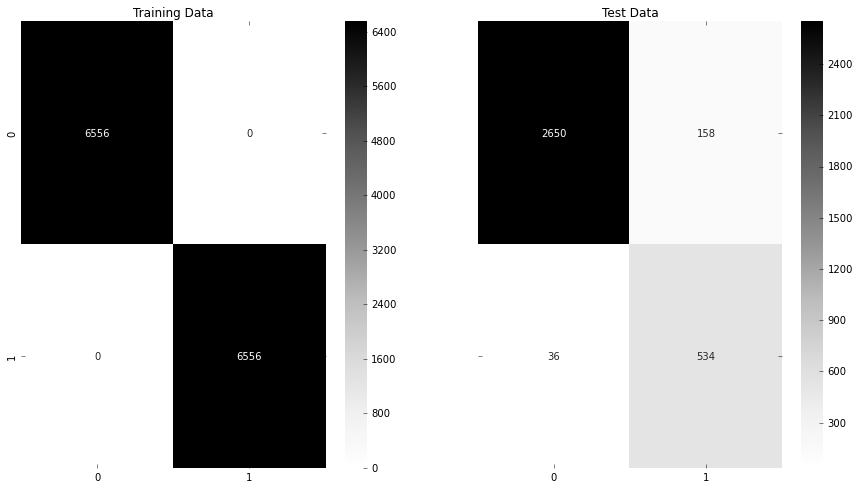

In [183]:
#Training Data and Test Data Confusion Matrix Comparison
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_knn_tuned)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_knn_tuned)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 1.000


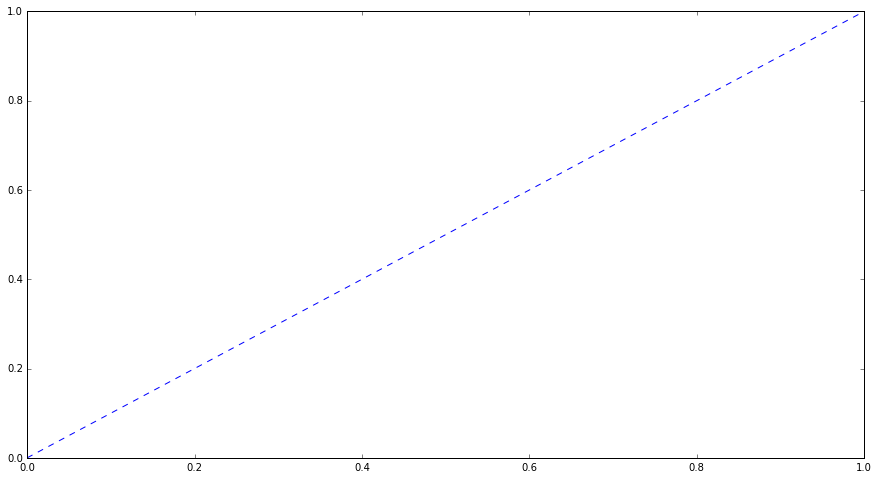

In [186]:

#AUC and ROC for the training data
# predict probabilities
probs = best_model_k.predict_proba(X_train_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_train = roc_auc_score(y_train_knn, probs)
print('AUC: %.3f' % auc_lor_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_knn, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.972


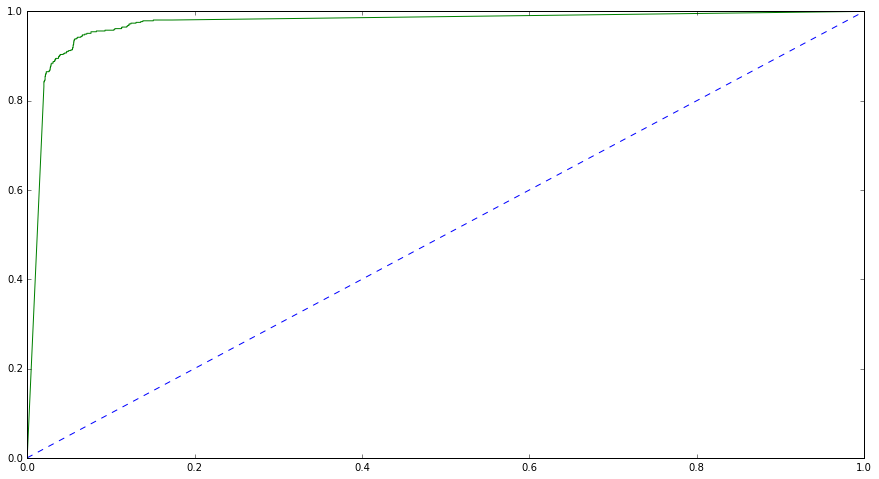

In [187]:
#AUC and ROC for the test data
# predict probabilities
probs = best_model_k.predict_proba(X_test_knn)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_test = roc_auc_score(y_test_knn, probs)
print('AUC: %.3f' % auc_lor_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [112]:
from sklearn.naive_bayes import GaussianNB 
NB_model = GaussianNB()

NB_model.fit(X_train, y_train.ravel())

GaussianNB()

In [113]:
NB_train_predict = NB_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, NB_train_predict)))
print()

Model Accuracy: 0.7788



In [114]:
NB_test_predict = NB_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, NB_test_predict)))
print()

Model Accuracy: 0.7191



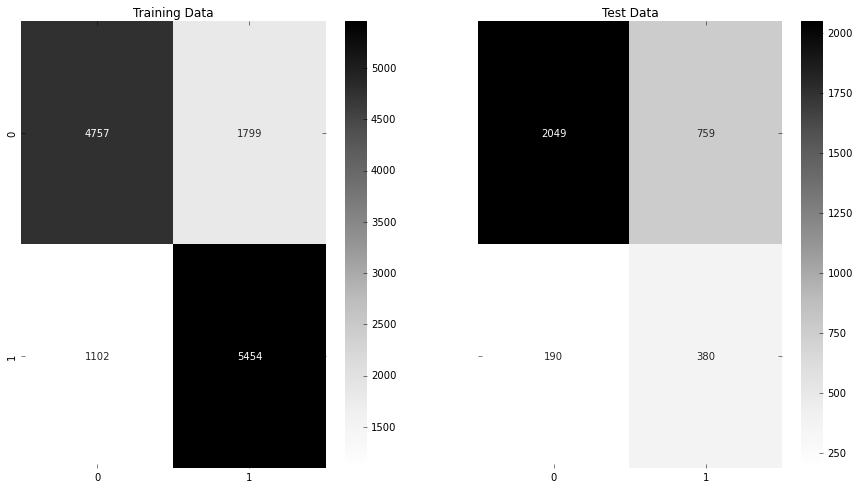

In [172]:
#Training Data and Test Data Confusion Matrix Comparison
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,NB_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,NB_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [115]:
print("Classification Report")
print(metrics.classification_report(y_train, NB_train_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.83      0.79      6556
           0       0.81      0.73      0.77      6556

    accuracy                           0.78     13112
   macro avg       0.78      0.78      0.78     13112
weighted avg       0.78      0.78      0.78     13112



In [116]:
print("Classification Report")
print(metrics.classification_report(y_test, NB_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.33      0.67      0.44       570
           0       0.92      0.73      0.81      2808

    accuracy                           0.72      3378
   macro avg       0.62      0.70      0.63      3378
weighted avg       0.82      0.72      0.75      3378



AUC: 0.867


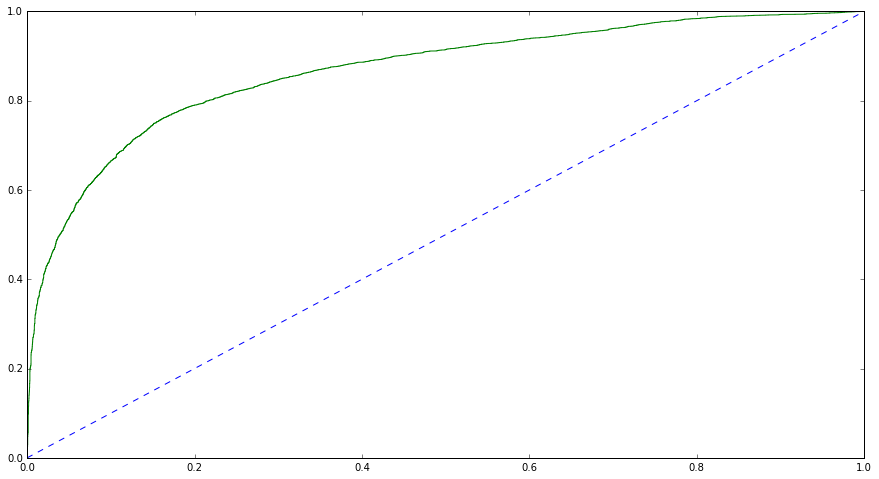

In [117]:
#AUC and ROC for the training data
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_nb_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_nb_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.770


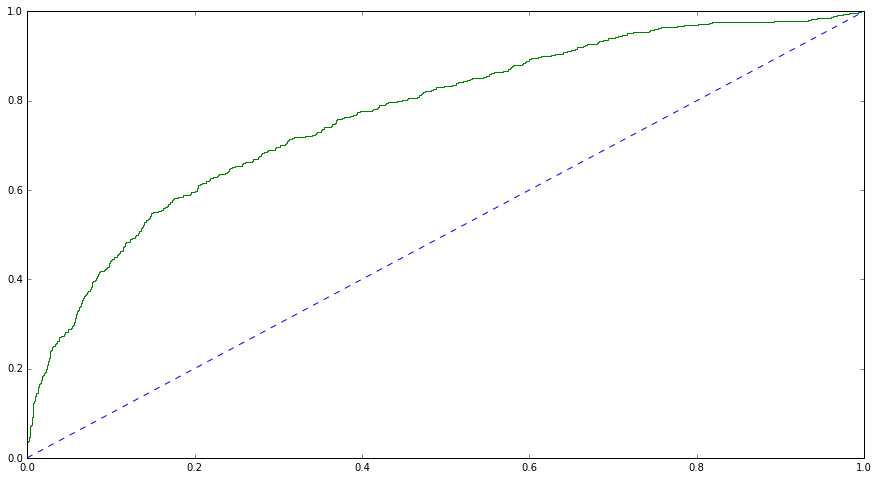

In [118]:
#AUC and ROC for the test data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_nb_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_nb_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc2 = RandomForestClassifier()

In [121]:
rfc2.fit(X_train, y_train)

RandomForestClassifier()

In [122]:
ytrain_predict_rf = rfc2.predict(X_train)
ytest_predict_rf = rfc2.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,ytrain_predict_rf)

array([[6556,    0],
       [   0, 6556]], dtype=int64)

In [124]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2770,   38],
       [  78,  492]], dtype=int64)

In [125]:
print(classification_report(y_train,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [126]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.93      0.86      0.89       570

    accuracy                           0.97      3378
   macro avg       0.95      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378



AUC: 1.000


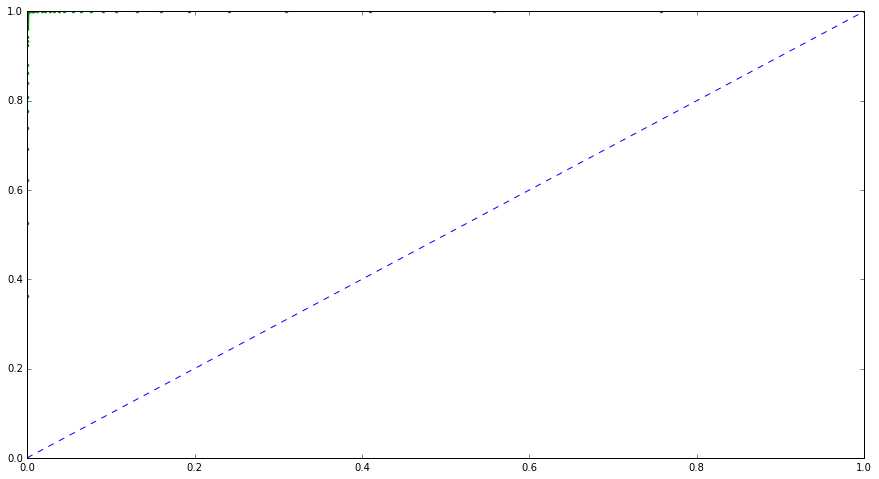

In [127]:
# AUC and ROC for the training data

# predict probabilities
probs = rfc2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.989


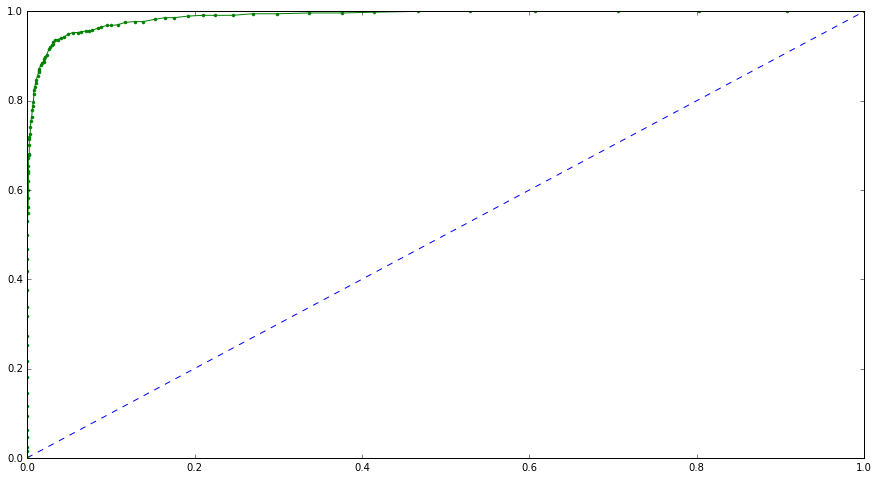

In [128]:
# AUC and ROC for the training data

# predict probabilities
probs = rfc2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

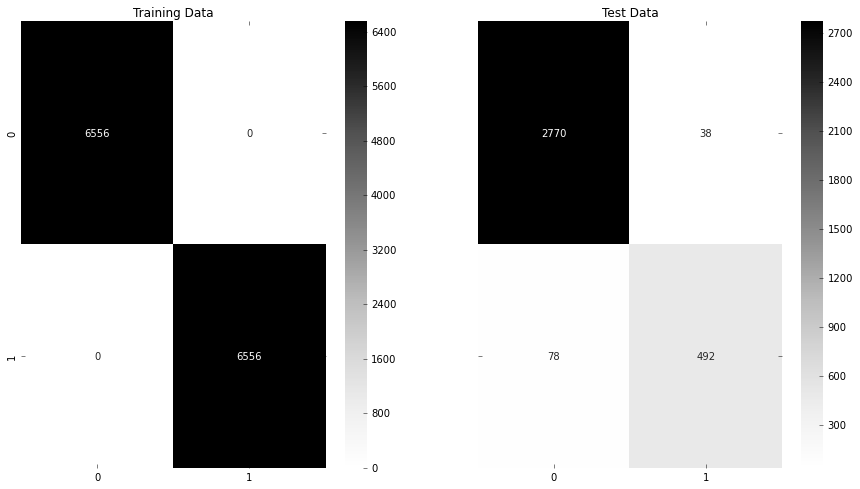

In [173]:
#Training Data and Test Data Confusion Matrix Comparison
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_rf)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_rf)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [130]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [131]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [132]:
best_grid = grid_search.best_estimator_

In [133]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [134]:
from sklearn.metrics import confusion_matrix,classification_report

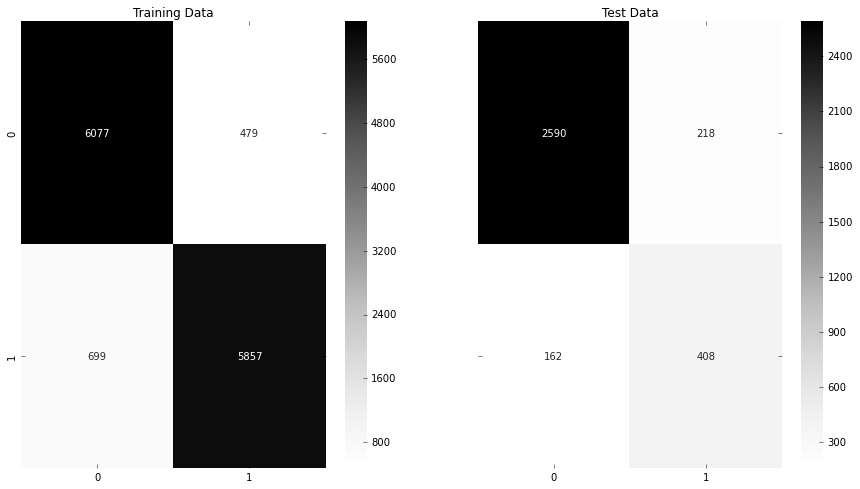

In [174]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [135]:
confusion_matrix(y_train,ytrain_predict)

array([[6077,  479],
       [ 699, 5857]], dtype=int64)

In [136]:
confusion_matrix(y_test,ytest_predict)

array([[2590,  218],
       [ 162,  408]], dtype=int64)

In [137]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      6556
           1       0.92      0.89      0.91      6556

    accuracy                           0.91     13112
   macro avg       0.91      0.91      0.91     13112
weighted avg       0.91      0.91      0.91     13112



In [138]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2808
           1       0.65      0.72      0.68       570

    accuracy                           0.89      3378
   macro avg       0.80      0.82      0.81      3378
weighted avg       0.89      0.89      0.89      3378



AUC: 0.970


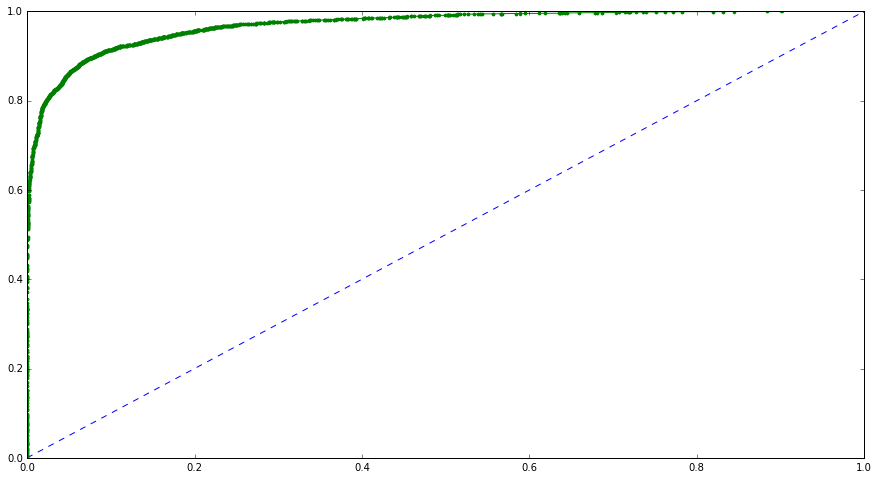

In [139]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.908


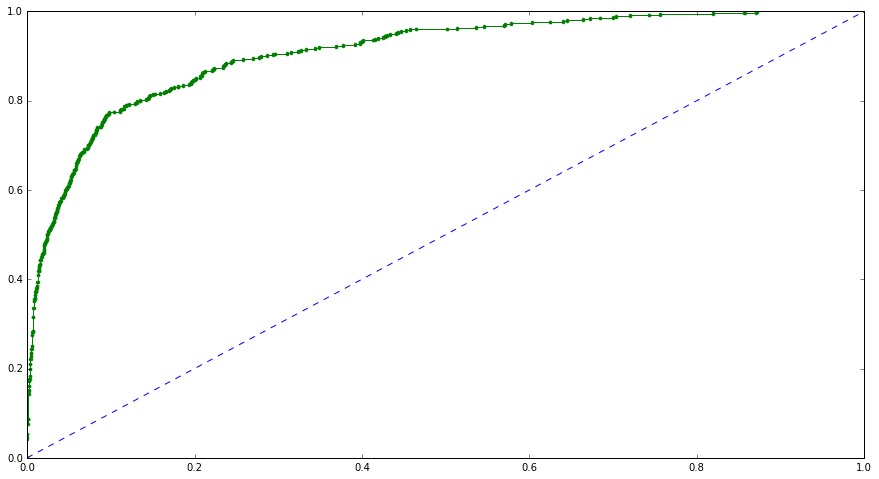

In [140]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Bagging

In [141]:
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(base_estimator=best_grid,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        max_features=4,
                                                        min_samples_leaf=50,
                                                        min_samples_split=150,
                                                        n_estimators=301),
                  n_estimators=100, random_state=1)

In [142]:
## Performance Matrix on train data set
y_train_predict_bag = Bagging_model.predict(X_train)

model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_bag))
print(metrics.classification_report(y_train, y_train_predict_bag))

0.9045149481391093
[[6035  521]
 [ 731 5825]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6556
           1       0.92      0.89      0.90      6556

    accuracy                           0.90     13112
   macro avg       0.90      0.90      0.90     13112
weighted avg       0.90      0.90      0.90     13112



In [146]:
## Performance Matrix on test data set
y_test_predict_bag = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_bag))
print(metrics.classification_report(y_test, y_test_predict_bag))

0.8851391355831854
[[2579  229]
 [ 159  411]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2808
           1       0.64      0.72      0.68       570

    accuracy                           0.89      3378
   macro avg       0.79      0.82      0.80      3378
weighted avg       0.89      0.89      0.89      3378



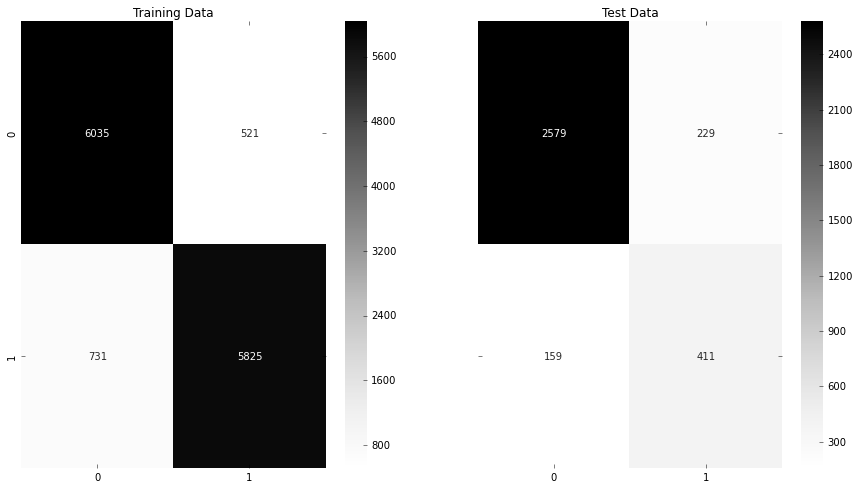

In [188]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict_bag)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict_bag)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 0.965


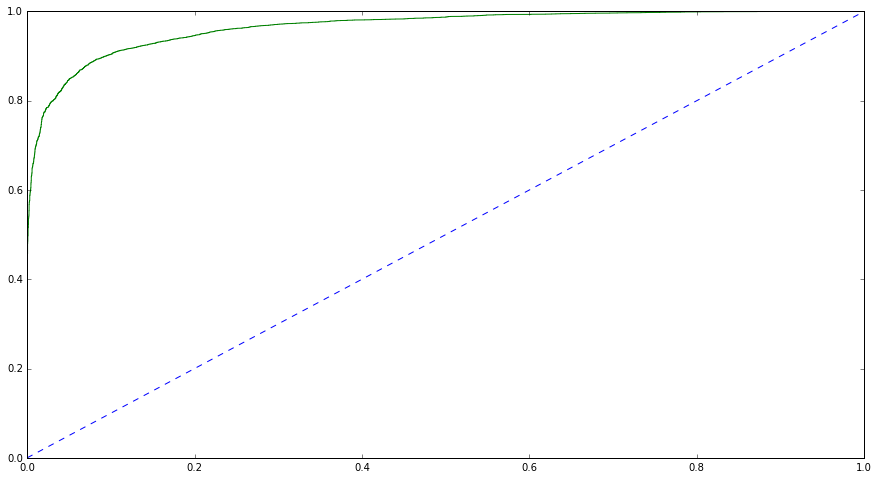

In [147]:
#AUC and ROC for the training data
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_lor_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.900


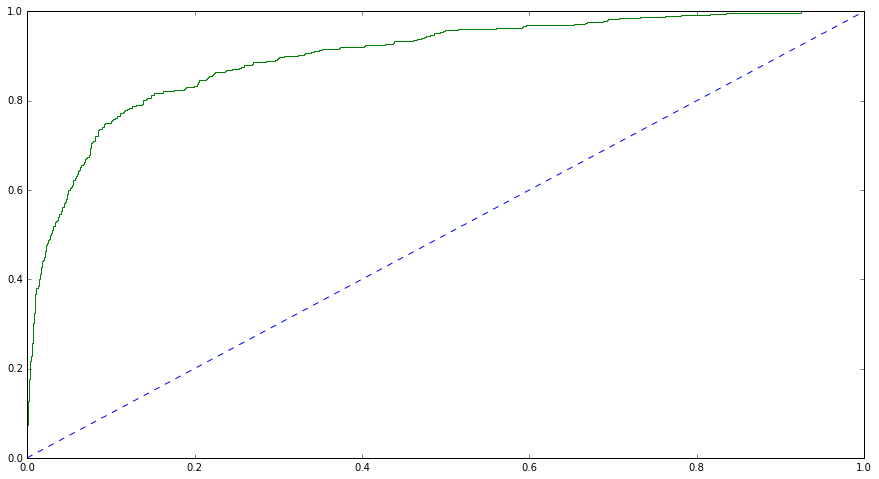

In [148]:
#AUC and ROC for the test data
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_lor_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Confusion Matrix


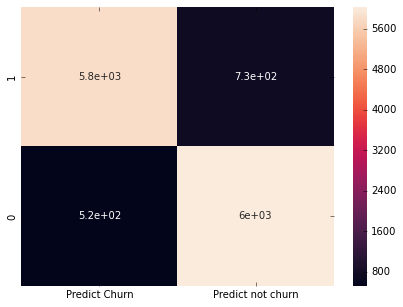

In [149]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_train, y_train_predict_bag, labels=(1, 0))

df_cm = pd.DataFrame(cm, index = [i for i in (1,0)],
                  columns = [i for i in ["Predict Churn","Predict not churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix


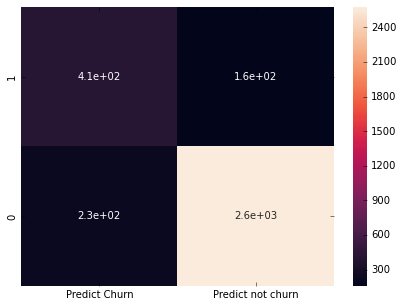

In [150]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_test_predict_bag, labels=(1, 0))

df_cm = pd.DataFrame(cm, index = [i for i in (1,0)],
                  columns = [i for i in ["Predict Churn","Predict not churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# ADA BOOSTING

In [151]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [152]:
## Performance Matrix on train data set
y_train_predict_ada = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_ada))
print(metrics.classification_report(y_train, y_train_predict_ada))

0.9240390482001221
[[6137  419]
 [ 577 5979]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6556
           1       0.93      0.91      0.92      6556

    accuracy                           0.92     13112
   macro avg       0.92      0.92      0.92     13112
weighted avg       0.92      0.92      0.92     13112



In [153]:
## Performance Matrix on test data set
y_test_predict_ada = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_ada))
print(metrics.classification_report(y_test, y_test_predict_ada))

0.8786264061574897
[[2610  198]
 [ 212  358]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2808
           1       0.64      0.63      0.64       570

    accuracy                           0.88      3378
   macro avg       0.78      0.78      0.78      3378
weighted avg       0.88      0.88      0.88      3378



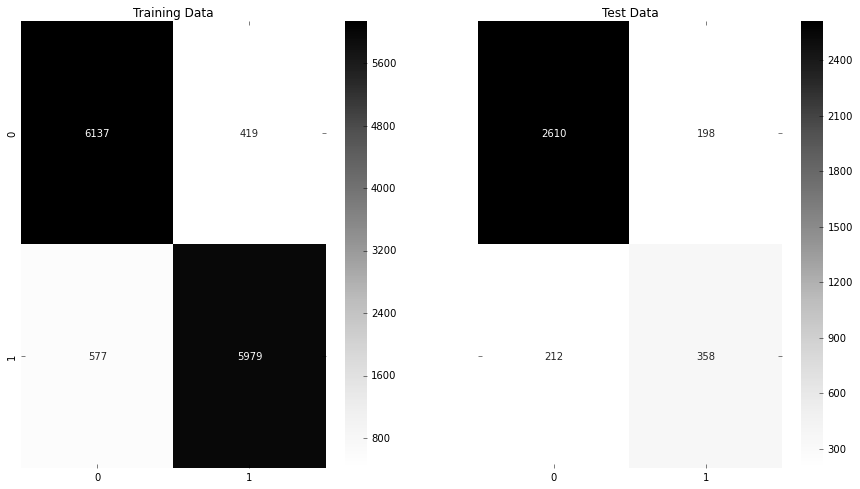

In [189]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict_ada)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict_ada)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 0.977


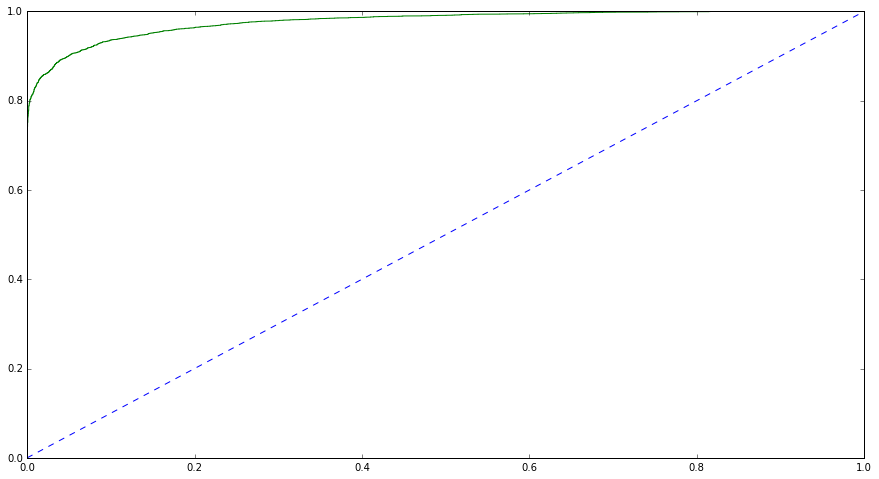

In [154]:
#AUC and ROC for the training data
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_lor_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.902


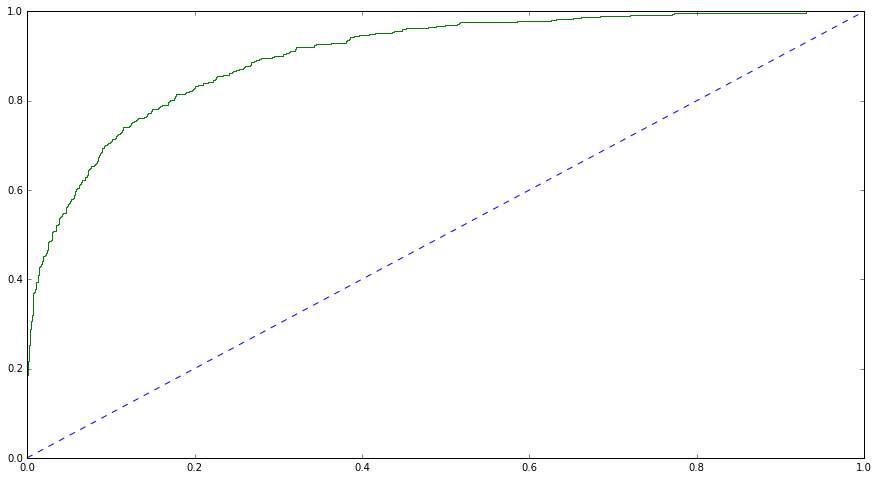

In [155]:
#AUC and ROC for the test data
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_lor_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Confusion Matrix


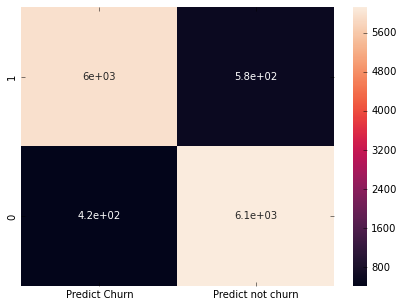

In [156]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_train, y_train_predict_ada, labels=(1, 0))

df_cm = pd.DataFrame(cm, index = [i for i in (1,0)],
                  columns = [i for i in ["Predict Churn","Predict not churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix


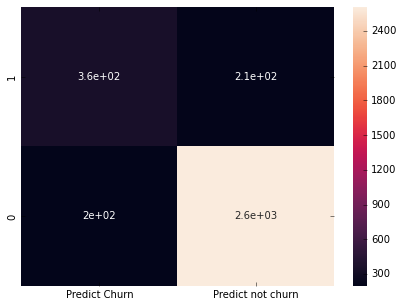

In [157]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_test_predict_ada, labels=(1, 0))

df_cm = pd.DataFrame(cm, index = [i for i in (1,0)],
                  columns = [i for i in ["Predict Churn","Predict not churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# GRADIENT BOOSTING

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=100 , random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [159]:
## Performance Matrix on train data set
y_train_predict_gbcl = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gbcl))
print(metrics.classification_report(y_train, y_train_predict_gbcl))

0.936470408785845
[[6260  296]
 [ 537 6019]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6556
           1       0.95      0.92      0.94      6556

    accuracy                           0.94     13112
   macro avg       0.94      0.94      0.94     13112
weighted avg       0.94      0.94      0.94     13112



In [160]:
## Performance Matrix on test data set
y_test_predict_gbcl = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gbcl))
print(metrics.classification_report(y_test, y_test_predict_gbcl))

0.9055654233274126
[[2691  117]
 [ 202  368]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2808
           1       0.76      0.65      0.70       570

    accuracy                           0.91      3378
   macro avg       0.84      0.80      0.82      3378
weighted avg       0.90      0.91      0.90      3378



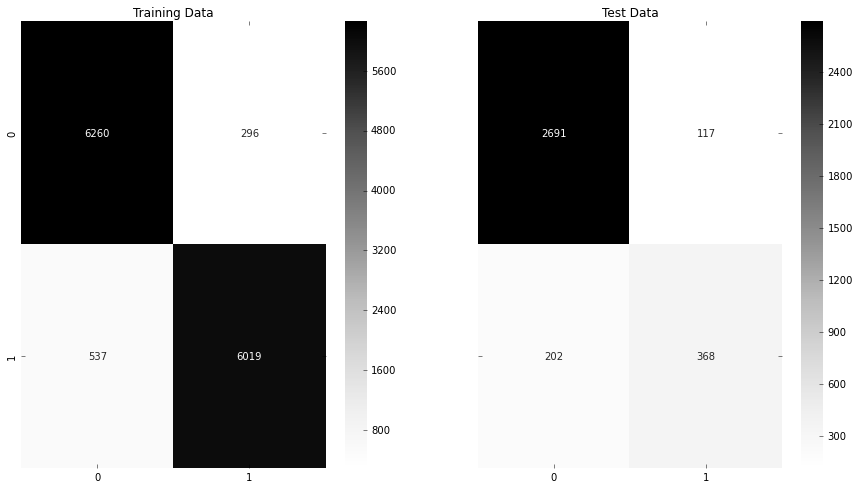

In [190]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict_gbcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict_gbcl)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 0.984


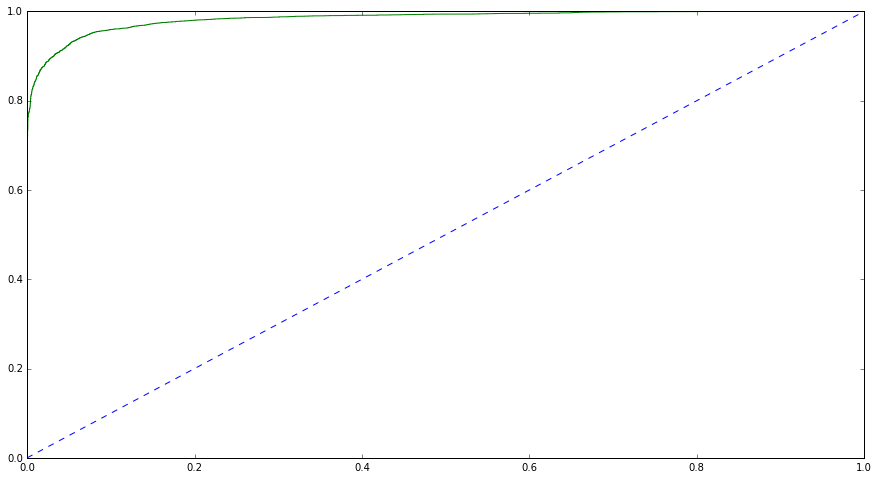

In [161]:
#AUC and ROC for the training data
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_lor_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.921


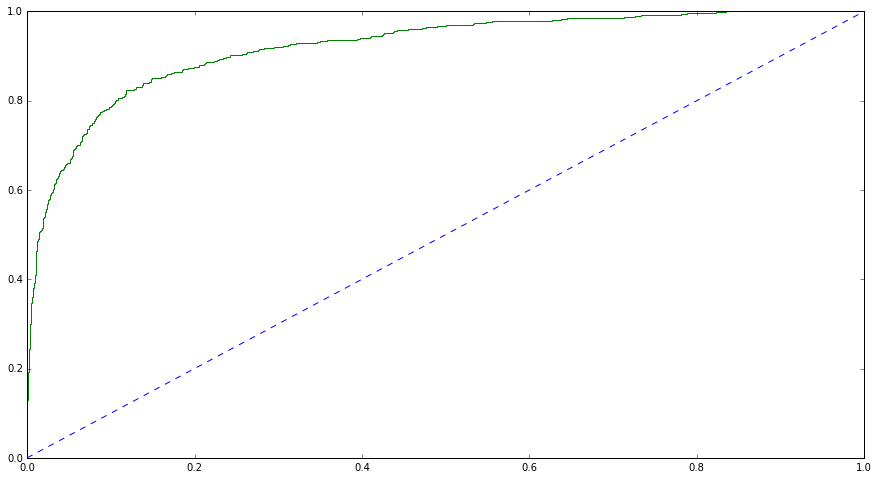

In [162]:
#AUC and ROC for the test data
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc_lor_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_lor_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Confusion Matrix


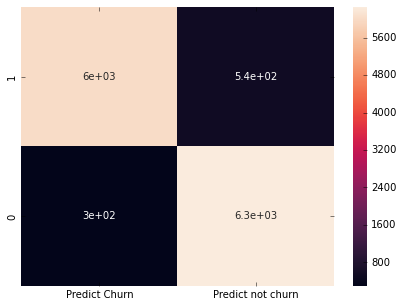

In [163]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_train, y_train_predict_gbcl, labels=(1, 0))

df_cm = pd.DataFrame(cm, index = [i for i in (1,0)],
                  columns = [i for i in ["Predict Churn","Predict not churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Confusion Matrix


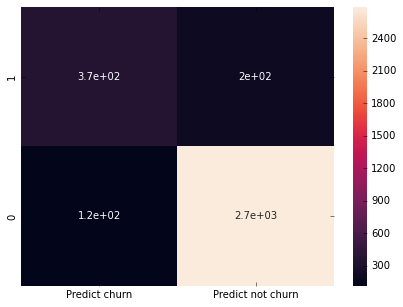

In [164]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_test_predict_gbcl, labels=(1, 0))

df_cm = pd.DataFrame(cm, index = [i for i in (1,0)],
                  columns = [i for i in ["Predict churn","Predict not churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)